
## <p style="text-align: center;">MIS 285N - Big Data and Distributed Programming</p>
## <p style="text-align: center;">Problem Set 2: Machine Learning Experiments</p>
## <p style="text-align: center;">Total points: 10</p>
## <p style="text-align: center;">Due: Tuesday, 24th September submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**.

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting.

## Task 1: Logistic Regression on PCA components
In the following code, you have to add a few lines to apply logistic regression to the PCA components. More specifically:
 0. Load the Iris Dataset
 1. Implement Standard Scalar based feature extraction
 2. Implement PCA and use all components and compute the explained variance of each PCA component
 3. Implement PCA and use two components that explain maximum variance. Implement logistic regression model to train and test and give a visual display of the performance by showing a plot of the decision regions along with the test data. Print the test accuracy.

In [1]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

In [2]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    edgecolor='black',
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')
        

def versiontuple(v):
    return tuple(map(int, (v.split("."))))

In [3]:
## Load Iris Dataset and use all four features
iris = pd.read_csv("iris.csv")

class_mapping = {label:idx+1 for idx,label in 
                 enumerate(np.unique(iris.iloc[:, 5].values))}
iris['Species'] = iris['Species'].map(class_mapping)

X, y = iris.iloc[:, 1:5].values, iris.iloc[:, 5].values

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, random_state=0)

## Use StandardScalar to scale the features
sc = StandardScaler()
sc.fit(X_train)
X_trainstd = sc.transform(X_train)
X_teststd = sc.transform(X_test)

In [4]:
## case1
X_case1, y_case1 = iris.iloc[:, [1,3]].values, iris.iloc[:, 5].values

X_train, X_test, y_train, y_test = \
    train_test_split(X_case1, y_case1, test_size=0.3, random_state=0)

lr = LogisticRegression(C=10)
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Misclassified samples: 7
Accuracy: 0.84


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


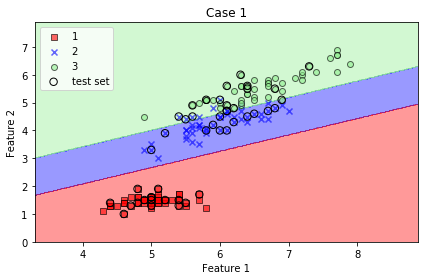

In [5]:
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined,classifier=lr, test_idx=range(105, 150))
plt.title('Case 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('logistic_regression.png', dpi=300)
plt.show()

In [6]:
## case 2
X, y = iris.iloc[:, [1,3]].values, iris.iloc[:, 5].values

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, random_state=0)

## Use StandardScalar to scale the features
sc = StandardScaler()
sc.fit(X_train)
X_trainstd = sc.transform(X_train)
X_teststd = sc.transform(X_test)

lr = LogisticRegression(C=10)
lr.fit(X_trainstd,y_train)

y_pred = lr.predict(X_teststd)

print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Misclassified samples: 4
Accuracy: 0.91


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


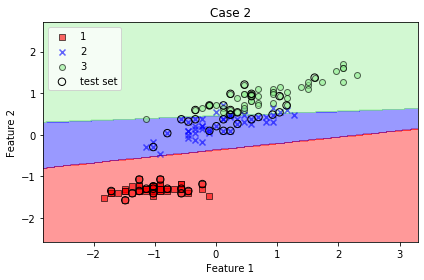

In [7]:
X_combined = np.vstack((X_trainstd, X_teststd))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined,classifier=lr, test_idx=range(105, 150))
plt.title('Case 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('logistic_regression.png', dpi=300)
plt.show()

In [8]:
## Implement PCA and use all components 
## giving the explained variance of each Principal Component
X, y = iris.iloc[:, 1:5].values, iris.iloc[:, 5].values

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, random_state=0)

sc = StandardScaler()
sc.fit(X_train)
X_trainstd1 = sc.transform(X_train)
X_teststd1 = sc.transform(X_test)

pca = PCA()
pca.fit_transform(X_trainstd1)
pca.explained_variance_ratio_

array([0.71803699, 0.24442718, 0.03337158, 0.00416425])

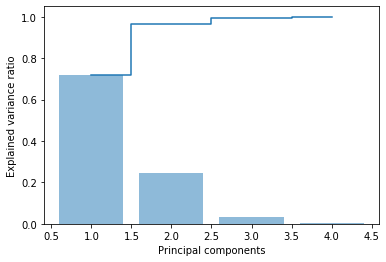

In [9]:
plt.bar(range(1, 5), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 5), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

In [10]:
## case3
x, y = iris.iloc[:, [1,3]].values, iris.iloc[:, 5].values # y is species
X_train, X_test, y_train, y_test = \
    train_test_split(x, y, test_size=0.3, random_state=0)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
pca2 = PCA(n_components=2)
X_train_pca_scikit = pca2.fit_transform(X_train_std)
X_test_pca_scikit = pca2.transform(X_test_std)
lr = LogisticRegression(C=10, random_state=0)
lr.fit(X_train_pca_scikit, y_train) # where learning from the training data occurs
y_pred = lr.predict(X_test_pca_scikit)
# Lets see how good we did
print('Misclassified samples: %d' %(y_test != y_pred).sum())
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test,y_pred))

Misclassified samples: 4
Accuracy: 0.91


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


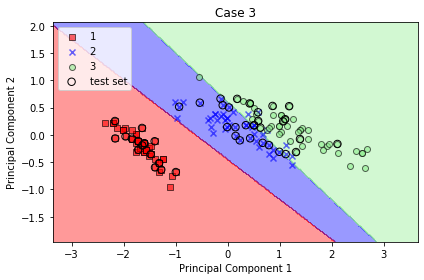

In [11]:
X_combined_std = np.vstack((X_train_pca_scikit, X_test_pca_scikit))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined_std, y_combined,
                      classifier=lr, test_idx=range(105, 150))
plt.title('Case 3')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('logistic_regression.png', dpi=300)
plt.show()

In [12]:
# from IPython.display import Image
# Image(filename=r'iris-task-1-case-1.png')

In [13]:
# from IPython.display import Image
# Image(filename=r'iris-task-1-case-2.png')

In [14]:
# from IPython.display import Image
# Image(filename=r'iris-task-1-case-3.png')

### Explain what you observed?
### I found by applying standardizing two features I selected, the model performance went up:  the accuracy rate went from 84% to 91%. That makes sense since by applying standardization, we make the scale of X into a proper level which helps model predict target variable. And after using top two principal components, the accuracy rate is  the exact same number, which might need us tune the paremeter to improve model's performance. And probably PCA works the best in the case where there are lots of features and we only select top n principal components to make predictions. In this case, we just have four features in total, which is why PCA doesn't improve the accuracy rate. 

# Task 2 

In this exercise, we will take two features iris dataset and train using AdalineGD vs. AdalineSGD based on the implementation provided below and the perceptron model implementations from scikit-learn and one provided below.  
You should have three plot (Adaline Rule vs. AdalineSGD vs. scikit Perceptron) along with performance comparison between these four methods. What do you observe in terms of performance difference? Please explain your interpretation. 

However, you are free to use any combination of two features out of 4 features given in this dataset. 


In [15]:
iris = pd.read_csv("iris.csv")

class_mapping = {label:idx+1 for idx,label in 
                 enumerate(np.unique(iris.iloc[:, 5].values))}

iris['Species'] = iris['Species'].map(class_mapping)

X, y = iris.iloc[:, [1,3]].values, iris.iloc[:, 5].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
## Use StandardScalar to scale the features
sc = StandardScaler()
sc.fit(X_train)
X_trainstd = sc.transform(X_train)
X_teststd = sc.transform(X_test)

In [16]:
# Sebastian Raschka's implementation of the Adaline Rule
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    cost_ : list
        Sum-of-squares cost function value in each epoch.
        (After training, we can look at this to see if our algorithm converged)
    """
    def __init__(self, eta=0.01, n_iter=50, debug=False):
        self.eta = eta
        self.n_iter = n_iter
        self.debug = debug

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        if self.debug: print("Initial Weights:", self.w_)
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # Please note that the "activation" method has no effect
            # in the code since it is simply an identity function. We
            # could write `output = self.net_input(X)` directly instead.
            # The purpose of the activation is more conceptual, i.e.,  
            # in the case of logistic regression, we could change it to
            # a sigmoid function to implement a logistic regression classifier.
            output = self.activation(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
            if self.debug: print("New Weights:", self.w_)
            if self.debug: print("Cost:", cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return self.net_input(X)

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(X) >= 0.0, 1, -1)
    
    
## your code here

In [17]:
ada = AdalineGD(n_iter=30,eta=0.01)
ada.fit(X_trainstd,y_train)
# Step3: Use the model to predict the test data
y_pred = ada.predict(X_teststd)
# Lets see how good we did
print('Misclassified samples: %d' %(y_test != y_pred).sum())
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test,y_pred))

Misclassified samples: 29
Accuracy: 0.36


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


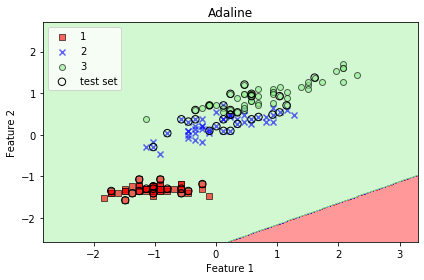

In [18]:
X_combined = np.vstack((X_trainstd, X_teststd))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined, y=y_combined, classifier=ada,test_idx=range(105, 150))
plt.title('Adaline')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [19]:
from numpy.random import seed

class AdalineSGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    cost_ : list
        Sum-of-squares cost function value averaged over all
        training samples in each epoch.
    shuffle : bool (default: True)
        Shuffles training data every epoch if True to prevent cycles.
    random_state : int (default: None)
        Set random state for shuffling and initializing the weights.
        
    """
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        if random_state:
            seed(random_state)
        
    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self

    def partial_fit(self, X, y):
        """Fit training data without reinitializing the weights"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self

    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = np.random.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """Initialize weights to zeros"""
        self.w_ = np.zeros(1 + m)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights"""
        output = self.net_input(xi)
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return self.net_input(X)

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(X) >= 0.0, 1, -1)
    
    
## your code here

adasgd = AdalineSGD(n_iter=30,eta=0.01)
adasgd.fit(X_trainstd,y_train)
# Use the model to predict the test data
y_pred = adasgd.predict(X_teststd)
# Lets see how good we did
print('Misclassified samples: %d' %(y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test,y_pred))

Misclassified samples: 29
Accuracy: 0.36


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


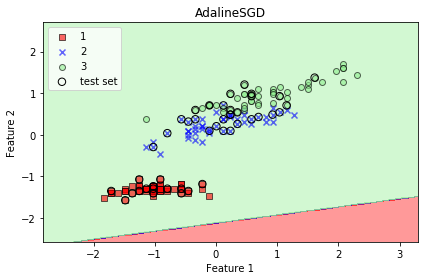

In [20]:
X_combined = np.vstack((X_trainstd, X_teststd))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined, y=y_combined, classifier=adasgd,test_idx=range(105, 150))
plt.title('AdalineSGD')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [21]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

# ## your code here
class_mapping = {label:idx+1 for idx,label in 
                 enumerate(np.unique(iris.iloc[:, 5].values))}
iris['Species'] = iris['Species'].map(class_mapping)

X, y = iris.iloc[:, [1,3]].values, iris.iloc[:, 5].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# ## Use StandardScalar to scale the features

sc = StandardScaler()
sc.fit(X_train)
X_trainstd = sc.transform(X_train)
X_teststd = sc.transform(X_test)

ppn = Perceptron(max_iter=40,eta0=0.1,random_state=0)
ppn.fit(X_trainstd,y_train)
# Use the model to predict the test data
y_pred = ppn.predict(X_teststd)
# Lets see how good we did
print('Misclassified samples: %d' %(y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test,y_pred))

Misclassified samples: 11
Accuracy: 0.76


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


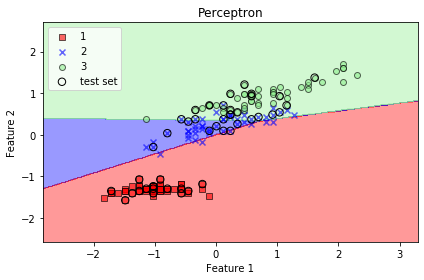

In [22]:
X_combined = np.vstack((X_trainstd, X_teststd))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined, y=y_combined, classifier=ppn,test_idx=range(105, 150))

plt.title('Perceptron')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('adalineSGD.png', dpi=300)
plt.show()

In [23]:
# Sebastian Raschka's implementation of the Perceptron Learning rule
import numpy as np

class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01,n_iter=10,debug=False,random_seed=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_seed = random_seed
        self.debug = debug

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_seed) 
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []
        if self.debug: print("Initial Weights:", self.w_)
        for iter in range(self.n_iter):
            errors = 0
            if self.debug: print("Iteration:", iter)
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                if self.debug: print(xi, target, self.predict(xi), update)
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
                if self.debug: print("New Weights:", self.w_)
            self.errors_.append(errors) 
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [24]:
perc1 = Perceptron(eta=0.1,n_iter=40,random_seed=1)
perc1.fit(X_trainstd,y_train)
# Use the model to predict the test data
y_pred = perc1.predict(X_teststd)
# Lets see how good we did
print('Misclassified samples: %d' %(y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test,y_pred))

Misclassified samples: 33
Accuracy: 0.27


### After using above four methods, I found the scikit Perceptron has the best performance in terms of the accuracy rate (76% vs 36%). Adaline and AdalineSGD has similar outputs but we can still observe the difference between those two by looking at the graph we plot. Both adaline and adalineSGD have a low accuracy rate, so there are not good models in this classification problem. For some reason, Sebastian's Perceptron has the lowest accuracy rate, so it is necessary to tune the parameters to improve its ability of predicting new data points. 

In [25]:
# from IPython.display import Image
# Image(filename=r'iris-task-2-adaline.png')

In [26]:
# from IPython.display import Image
# Image(filename=r'task-2-adalineSGD.png')

In [27]:
# from IPython.display import Image
# Image(filename=r'iris-task-2-perceptron.png')

## Task 3 Explore parameter tuning in Scikit Logistic regression

We have seen that the 'C' parameter in logistic regression determines the strength of logistic regression. In this exercise, you will tune the 'C' parameter to get best performance from the model for iris data classification. 
Write the code to run logistic regression on iris data and report the performance for 10 different values of 'C' (just Accuracy will do).

In [28]:
iris = pd.read_csv("iris.csv")

class_mapping = {label:idx for idx,label in 
                 enumerate(np.unique(iris.iloc[:, 5].values))}

iris['Species'] = iris['Species'].map(class_mapping)

X, y = iris.iloc[:, 1:5].values, iris.iloc[:, 5].values

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, random_state=0)

## Use StandardScalar to scale the features
sc = StandardScaler()
sc.fit(X_train)
X_trainstd = sc.transform(X_train)
X_teststd = sc.transform(X_test)


LRAccuracy = []
for cvalue in range(1,20,2):
    lr = LogisticRegression(C=cvalue, random_state=0)
    lr.fit(X_trainstd,y_train)
    y_pred = lr.predict(X_teststd)
    LRAccuracy.append(round(accuracy_score(y_test, y_pred),2))

In [29]:
LRAccuracy

[0.82, 0.89, 0.96, 0.96, 0.96, 0.96, 0.96, 0.98, 0.98, 0.98]

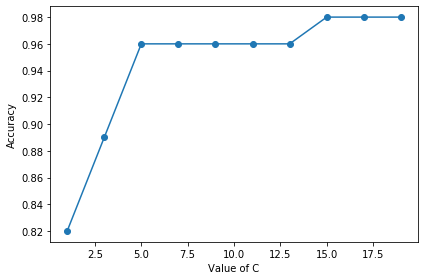

In [30]:
plt.plot(range(1,20,2), LRAccuracy, marker='o')
plt.xlabel('Value of C')
plt.ylabel('Accuracy')
plt.tight_layout()
#plt.savefig('elbow.png', dpi=300)
plt.show()

## Based on the accuracy rate, the optimal C value from the range of 1 to 20 is one of the following values: 15,17 and 19.

## Task 4 Explore parameter tuning in SVM

Similar to the previous task, use the SVM model for various kernels: ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’ and report the performance (just Accuracy will do). 

In [31]:
iris = pd.read_csv("iris.csv")

class_mapping = {label:idx for idx,label in 
                 enumerate(np.unique(iris.iloc[:, 5].values))}

iris['Species'] = iris['Species'].map(class_mapping)

X, y = iris.iloc[:, 1:5].values, iris.iloc[:, 5].values

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, random_state=0)

## Use StandardScalar to scale the features
sc = StandardScaler()
sc.fit(X_train)
X_trainstd = sc.transform(X_train)
X_teststd = sc.transform(X_test)

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
SVM_Accuracy = []
for ker in kernels:
    svm = SVC(kernel=ker,C=10,random_state=0)
    svm.fit(X_trainstd,y_train)
    y_pred = svm.predict(X_teststd)
    SVM_Accuracy.append(accuracy_score(y_test, y_pred))

In [32]:
SVM_Accuracy

[0.9777777777777777,
 0.9555555555555556,
 0.9777777777777777,
 0.9333333333333333]

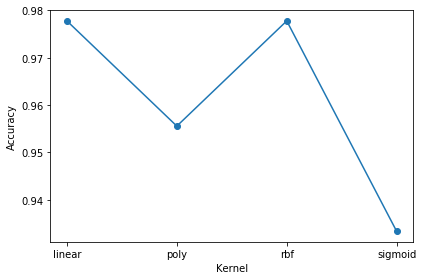

In [33]:
plt.plot(kernels, SVM_Accuracy, marker='o')
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.tight_layout()
#plt.savefig('elbow.png', dpi=300)
plt.show()

## Based on the accuracy rate, the optimal kernels are linear and rbf.